In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiple_channel_matrix_generator

In [2]:
import keras
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
df = pd.read_csv('/mnt/c/Users/majin/DIRECT/HyperBinding/Labeled-HLA-A-0201.csv')

In [4]:
df_dataset = df[['sequence','label']]

In [5]:
df_dataset.shape

(8950, 2)

In [6]:
df_dataset.head()

,sequence,label
0,ILGFVFTL,P
1,FLGRIWPS,P
2,FLGKIWPS,P
3,FLGKIWSS,P
4,GLAVAMEV,P


In [7]:
y_data = []
for label in df_dataset['label']:
    if label == 'P':
        y_data.append([0])
    elif label == 'N':
        y_data.append([1])
    else:
        continue
y_data = np.array(y_data)

In [8]:
y_data = to_categorical(y_data)

In [9]:
x_data = []
for sequence in df_dataset['sequence']:
    x_data.append(multiple_channel_matrix_generator.multiple_channel_generator(sequence))
x_data = np.array(x_data, dtype = 'float32')

In [10]:
x_data.shape

(8950, 3, 12, 21)

In [11]:
x_data = x_data.reshape((x_data.shape[0],12,21,3))

In [12]:
x_data.shape

(8950, 12, 21, 3)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_validate,y_train,y_validate = train_test_split(x_data,y_data,test_size = 0.2) ##tunabel 

In [14]:
from keras import layers
from keras import models

In [17]:
model=models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(12,21,3))) ##tunabel 
model.add(layers.MaxPooling2D((2, 2))) ##tunabel 
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (2, 2), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))  
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.5, nesterov=True) 

In [18]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                  epochs=50, 
                  batch_size=32, 
                  verbose=1, 
                  validation_data=(x_validate, y_validate))  

Train on 7160 samples, validate on 1790 samples
Epoch 1/50
7160/7160 [==============================] - 1s 159us/step - loss: 0.8938 - accuracy: 0.6330 - val_loss: 0.5431 - val_accuracy: 0.7419
Epoch 2/50
7160/7160 [==============================] - 1s 132us/step - loss: 0.5688 - accuracy: 0.7151 - val_loss: 0.5581 - val_accuracy: 0.7223
Epoch 3/50
7160/7160 [==============================] - 1s 129us/step - loss: 0.5484 - accuracy: 0.7265 - val_loss: 0.4815 - val_accuracy: 0.7676
Epoch 4/50
7160/7160 [==============================] - 1s 127us/step - loss: 0.5243 - accuracy: 0.7547 - val_loss: 0.4864 - val_accuracy: 0.7709
Epoch 5/50
7160/7160 [==============================] - 1s 128us/step - loss: 0.5156 - accuracy: 0.7535 - val_loss: 0.4992 - val_accuracy: 0.7587
Epoch 6/50
7160/7160 [==============================] - 1s 131us/step - loss: 0.5060 - accuracy: 0.7620 - val_loss: 0.5021 - val_accuracy: 0.7592
Epoch 7/50
7160/7160 [==============================] - 1s 129us/step - loss

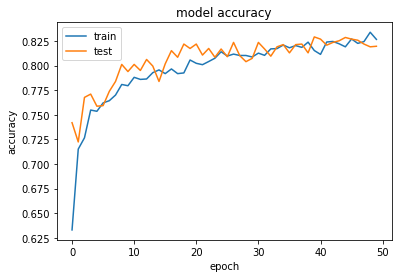

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

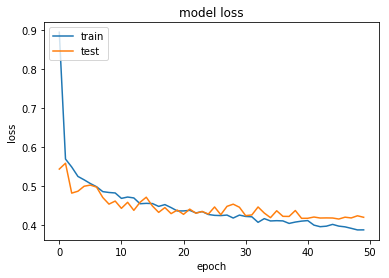

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save('mutiple_layers_CNN_model.h5')